In [6]:
from scipy.stats import norm, beta
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Generate toy data
cv1 = norm.rvs(size=100000)
cv2 = np.hstack((norm.rvs(loc=3, scale=1, size=75000), norm.rvs(loc=-1, scale=1, size=25000)))
cv3 = np.hstack((norm.rvs(loc=1, scale=1, size=75000), norm.rvs(loc=-2, scale=1, size=25000))) 

In [46]:
def prepare_two_cvs(cv1, cv2, bins, weights=None):
    """ 2D histogram two collective variables and prepare input for FES plot.
    Weights can be provided to weight the resulted 2D histogram. 
    cv1, cv2 and weights should be provided as (n,) numpy arrays.
    """
    
    # Define range of collective variables
    xmin = np.floor(cv1.min())
    xmax = np.ceil(cv1.max())
    ymin = np.floor(cv2.min())
    ymax = np.ceil(cv2.max())

    # Calculate bin size for each collective variable
    xbin_size = (xmax - xmin) / bins
    ybin_size = (ymax - ymin) / bins
    xedges = np.arange(xmin, xmax, xbin_size)
    yedges = np.arange(ymin, ymax, ybin_size)

    # Histogram values into 2D array
    H, xedges, yedges = np.histogram2d(cv1, cv2, bins=(xedges, yedges), weights=weights, normed=True)

    return -np.log(H.T), xedges, yedges


def plot_2D_fes(H, xedges, yedges, output_name):
    """ Helper plotting function."""
    
    fs = 22
    fig = plt.figure(figsize=[6, 4])
    ax = fig.add_subplot(111)
    
    imshow = ax.imshow(H, interpolation='nearest', origin='low',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect="auto", cmap="Spectral")
    fig.colorbar(imshow, ax = ax)
    
    fig.tight_layout()
    plt.savefig(output_name + ".png", dpi=600)
    plt.show()


def two_variable_fes(cv1, cv2, bins, output_name, weights=None):
    """ Plot 2D FES."""

    # Check if the weights are provided
    if weights is not None:
        weights = load_weights(weights)

    H, xedges, yedges = prepare_two_cvs(cv1, cv2, bins, weights)
    plot_2D_fes(H, xedges, yedges, output_name)

    return

/home/mariusk/software/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


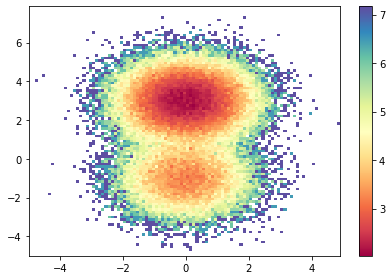

In [44]:
two_variable_fes(cv1, cv2, 100, "two_cv_toydata_fes")

In [47]:
def prepare_three_cvs(cv1, cv2, cv3, bins, weights):
    """ Prepare input for FES (2 CVs) and Contour(1 CV) plot.
    Weights can be provided to weight the resulted 2D histogram. 
    cv1, cv2, cv3 and weights should be provided as (n,) numpy arrays.
    """
    
    ## Generate a 2D histogram of first two collective variables
    # Define range of collective variables
    xmin = np.floor(cv1.min())
    xmax = np.ceil(cv1.max())
    ymin = np.floor(cv2.min())
    ymax = np.ceil(cv2.max())

    # Calculate bin size for each collective variable
    xbin_size = (xmax - xmin) / bins
    ybin_size = (ymax - ymin) / bins
    xedges = np.arange(xmin, xmax, xbin_size)
    yedges = np.arange(ymin, ymax, ybin_size)

    # Histogram values into 2D array
    H, xedges, yedges = np.histogram2d(cv1, cv2, bins=(xedges, yedges), weights=weights, normed=True)
    
    ## Generate a 2D histogram for the third collective variable
    # Stack collective variables
    stacked_cvs = np.vstack((cv1, cv2, cv3)).T

    # Create zeros arrays
    value_mat = np.zeros(H.shape)
    density_mat = np.zeros(H.shape)

    # Calculate a normalized count matrix of a third collective variable
    for indx, row in enumerate(stacked_cvs):
        scv1 = row[0]
        scv2 = row[1]
        scv3 = row[2]

    # Bin positions for indexing
        scv1_bin_indx = np.where((xedges <= scv1) == True)[0][-1] - 1
        scv2_bin_indx = np.where((yedges <= scv2) == True)[0][-1] - 1

        value_mat[scv1_bin_indx, scv2_bin_indx] += scv3
        density_mat[scv1_bin_indx, scv2_bin_indx] += 1

    J = np.divide(value_mat, density_mat)

    return -np.log(H.T), J.T, xedges, yedges


def plot_2D_contour_count(H, J, xedges, yedges, output_name):
    """ Helper plotting function."""
    
    fs = 22
    fig = plt.figure(figsize=[6, 4])
    ax = fig.add_subplot(111)
    
    imshow = ax.imshow(J, interpolation='nearest', origin='low',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect="auto", cmap="PRGn")
    fig.colorbar(imshow, ax = ax)
    
    contour = ax.contour(H, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Spectral", levels=10, linewidths=1)
    fig.colorbar(contour, ax = ax)
    
    fig.tight_layout()
    plt.savefig(output_name + ".png", dpi=300)
    plt.show()


def three_variable_contour_count(cv1, cv2, cv3, bins, output_name, weights=None):
    """ Plot a 2D contour FES plot with an overlay of count matrix."""

    # Check if the weights are provided
    if weights is not None:
        weights = load_weights(weights)

    H, J, xedges, yedges = prepare_three_cvs(cv1, cv2, cv3, bins, weights=weights)
    plot_2D_contour_count(H, J, xedges, yedges, output_name)

    return

/home/mariusk/software/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/home/mariusk/software/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/home/mariusk/software/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


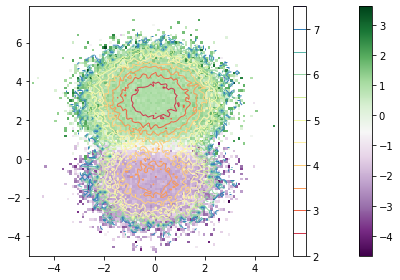

In [45]:
three_variable_contour_count(cv1, cv2, cv3, 100, "three_cv_toydata_fes")